In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.patches import Circle
import astropy.units as u
import sunpy.map
from AntennaUtils import *  

# Imprimimos estadísticas resumidas del DataFrame final
pd.set_option('display.float_format', '{:.10f}'.format)

c:\Users\2012m\Desktop\RT-32-SunImage\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# RT32 location (Ventspils, Latvia)
rt32_antenna = RT32()
rt32_antenna.set_location(latitude=57.5535171694, longitude=21.8545525000, elevation=20)

# Define constants
path = ''
year = 2024
month = 2
day = 15
hour_start = 11
minute_start = 25

temperature = u.Quantity(15.5, unit=u.deg_C)
pressure = u.Quantity(1013.25, unit=u.hPa)
relative_humidity = u.Quantity(70.0, unit=u.percent)
obswl =u.Quantity(50000, unit=u.nm) 

weather = Weather(temperature, pressure, relative_humidity, obswl)

observation = SpiralSunObservation(weather,rt32_antenna , year , month , day , hour_start , minute_start)

az_anten, el_anten , az_sun , el_sun , xx1 , yy1, utc = observation.calculatePositions()
observation.generateFile(path, az_anten , el_anten , utc)  

-------------------------------------------------------------
Saved:  sun_scan_240215_1125.ptf    3300   points


True

In [3]:
# Create DataFrame
sunPositionDf = pd.DataFrame({'UTC': utc,'SunX': xx1, 'SunY': yy1  })

fit_file_path = "lnsp4_5ch_240215_112029_122509.fit"
hdu_number = 1  # Number of the extension containing the binary table

# Converts the binary table to a Pandas DataFrame
data_df = bintable_to_pandas(fit_file_path, hdu_number)



In [4]:

RCP_11_df = processData(data_df)


Index(['LCP 01 4.07GHZ', 'LCP 04 6.42GHZ', 'LCP 07 8.40GHZ', 'LCP 09 9.80GHZ',
       'LCP 11 11.90GHZ', 'RCP 01 4.07GHZ', 'RCP 04 6.42GHZ', 'RCP 07 8.40GHZ',
       'RCP 09 9.80GHZ', 'RCP 11 11.90GHZ', 'UTC LCP 01', 'UTC LCP 04',
       'UTC LCP 07', 'UTC LCP 09', 'UTC LCP 11', 'UTC RCP 01', 'UTC RCP 04',
       'UTC RCP 07', 'UTC RCP 09', 'UTC RCP 11'],
      dtype='object')
1872
1872
1872


In [5]:
rest_of_df = getFinalProcessedData(observation , sunPositionDf,RCP_11_df)

print(rest_of_df.describe())

Interpolating data...
Filtering data...
Index(['UTC', 'SunX', 'SunY', 'UTC_11_4_11_90GHZ', 'STOKE_I_11_4_11_90GHZ',
       'STOKE_V_11_4_11_90GHZ'],
      dtype='object')
Calibrating data...
Cantre max:  [11423.84137931 -3763.4137931 ]
Sky min:  [11154.74827586 -3780.5       ]


c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df['STOKE_I_11_4_11_90GHZ'] = (rest_of_df['STOKE_I_11_4_11_90GHZ'] - min_vect[0]) / (max_vect[0] - min_vect[0])
c:\Users\2012m\Desktop\RT-32-SunImage\AntennaUtils.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_df['STOKE_V_11_4_11_90GHZ'] = (rest_of_df['STOKE_V_11_4_11_90GHZ'] - min_vect[1]) / (max_vect[1] - min_vect[1])


                   UTC           SunX           SunY  UTC_11_4_11_90GHZ  \
count   685.0000000000 685.0000000000 685.0000000000     685.0000000000   
mean  42621.7556554745  -0.0153950958   0.0009694430   42621.7556554745   
std     937.6610367383   8.8961245505   8.8748498084     937.6610367383   
min   41160.4980000000 -19.5238252477 -19.7547100932   41160.4980000000   
25%   41891.6510000000  -6.7963605713  -6.7417137855   41891.6510000000   
50%   42622.5670000000   0.0255968612  -0.0078787593   42622.5670000000   
75%   43351.6580000000   6.6470205597   6.6315459279   43351.6580000000   
max   44082.5800000000  18.5499579078  19.0087584409   44082.5800000000   

       STOKE_I_11_4_11_90GHZ  STOKE_V_11_4_11_90GHZ  
count         685.0000000000         685.0000000000  
mean            0.7415306178           0.8007056207  
std             0.3490917183           0.6771671898  
min             0.0232325692          -1.5509586276  
25%             0.4245806476           0.3511604440  


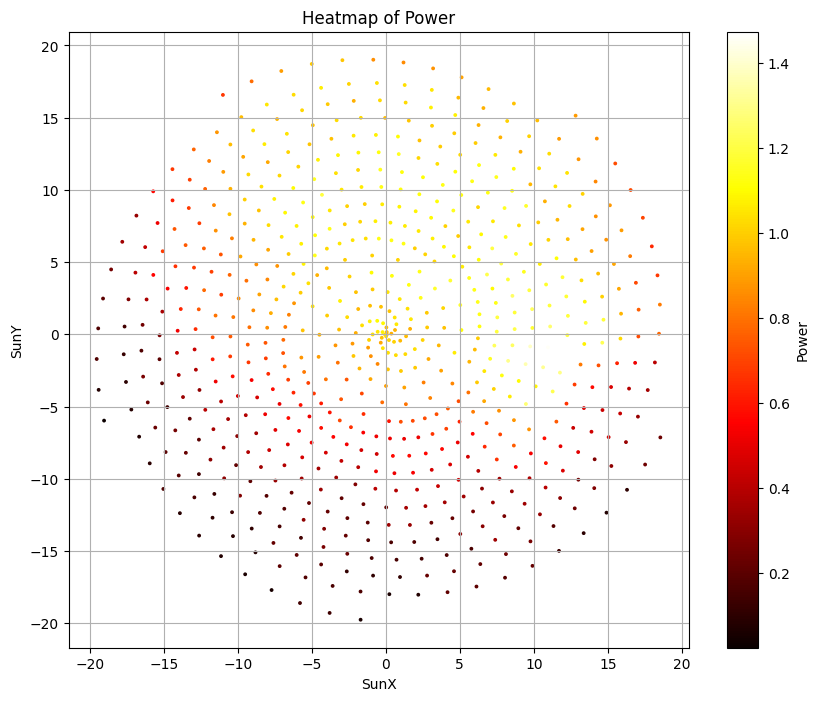

In [6]:
# Create the heatmap
plt.figure(figsize=(10, 8))
plt.scatter(rest_of_df['SunX'], rest_of_df['SunY'], c=rest_of_df['STOKE_I_11_4_11_90GHZ'], cmap='hot',s=3)
plt.colorbar(label='Power')
plt.xlabel('SunX')
plt.ylabel('SunY')
plt.title('Heatmap of Power')
plt.grid(True)  # Display the grid for clarity
plt.show()

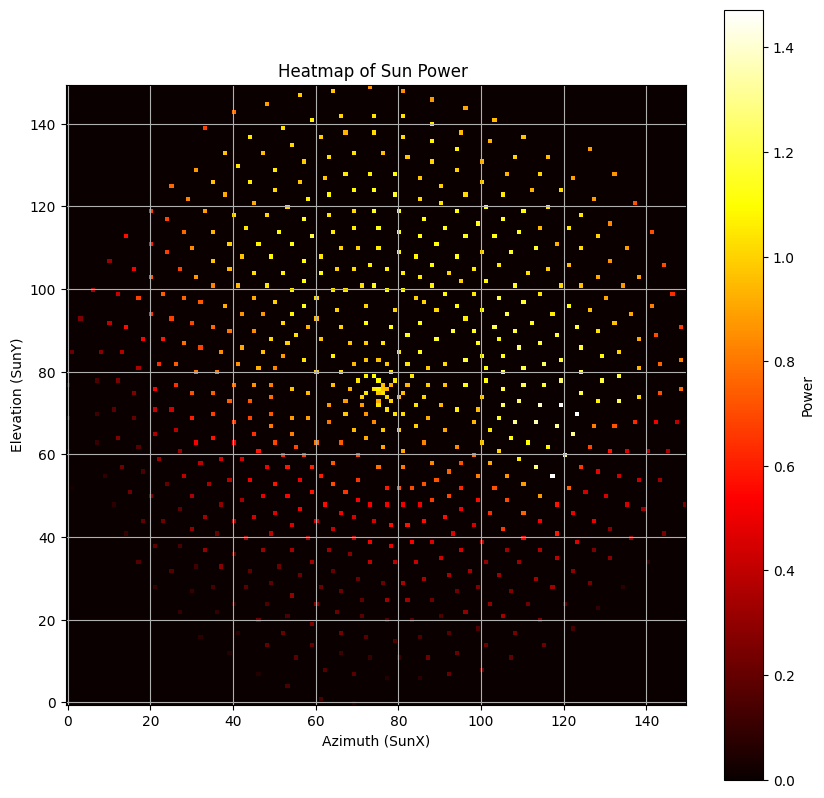

In [7]:
SunX = rest_of_df['SunX']
SunY = rest_of_df['SunY']
Power = rest_of_df['STOKE_I_11_4_11_90GHZ']

# Define the size of the grid and create a matrix of zeroes
grid_size = 150
grid_power = np.zeros((grid_size, grid_size))

# Calculate the scale for converting SunX and SunY coordinates to matrix indices
x_min, x_max = SunX.min(), SunX.max()
y_min, y_max = SunY.min(), SunY.max()
x_range = x_max - x_min
y_range = y_max - y_min

# Convert SunX and SunY coordinates to matrix indices
grid_x_index = ((SunX - x_min) / x_range * (grid_size - 1)).astype(int)
grid_y_index = ((SunY - y_min) / y_range * (grid_size - 1)).astype(int)

# Assign Power values to the matrix in the corresponding positions
grid_power[grid_y_index, grid_x_index] = Power

# Show the image
plt.figure(figsize=(10, 10))
plt.imshow(grid_power, cmap='hot', origin='lower')
plt.colorbar(label='Power')
plt.xlabel('Azimuth (SunX)')
plt.ylabel('Elevation (SunY)')
plt.title('Heatmap of Sun Power ')
plt.grid(True)  # Display the grid for clarity
plt.show()


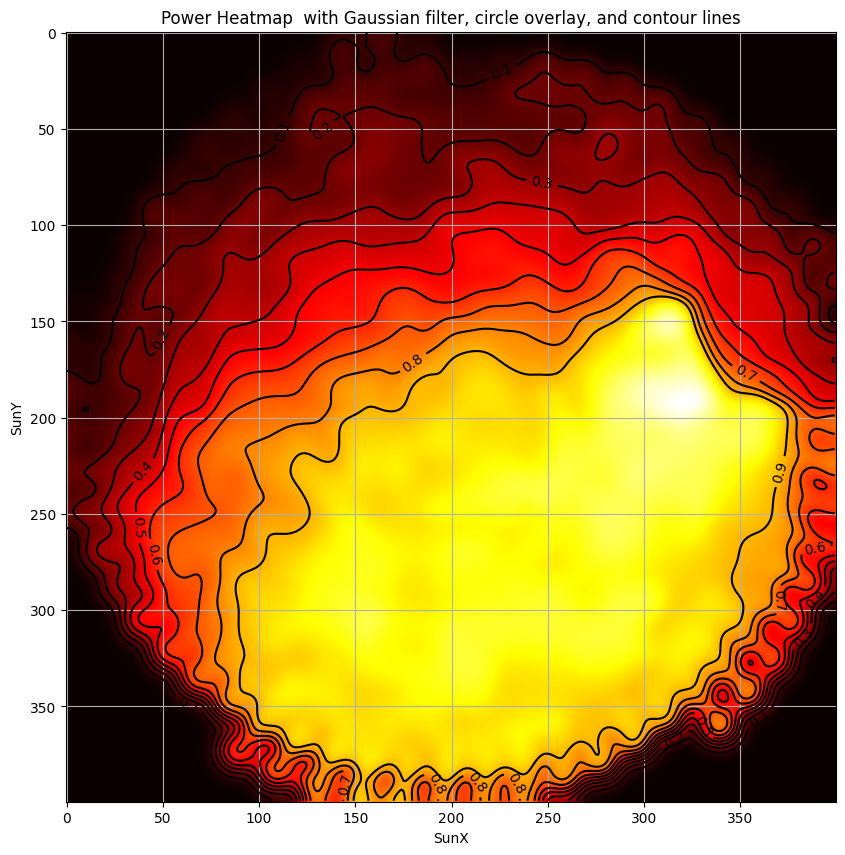

In [8]:
SunX = rest_of_df['SunX']
SunY = rest_of_df['SunY']
Power = rest_of_df['STOKE_I_11_4_11_90GHZ']

# Define grid size and point radius
grid_size = 400
point_radius = 10

# Calculate scale to convert SunX and SunY coordinates to matrix indices
x_min, x_max = SunX.min(), SunX.max()
y_min, y_max = SunY.min(), SunY.max()
x_range = x_max - x_min
y_range = y_max - y_min

# Create matrices for power and counts of points in each cell
Z = np.zeros((grid_size, grid_size))
counts = np.zeros((grid_size, grid_size))

# Iterate over each point and expand its power value in matrix Z
for x, y, power in zip(SunX, SunY, Power):
    i = int((x - x_min) / x_range * (grid_size - 1))
    j = int((y - y_min) / y_range * (grid_size - 1))
    
    y_indices, x_indices = np.ogrid[-j:grid_size-j, -i:grid_size-i]
    distances = np.sqrt(x_indices**2 + y_indices**2)
    
    indices_within_radius = np.where(distances <= point_radius)
    
    Z[indices_within_radius] += power
    counts[indices_within_radius] += 1

Z[counts > 0] /= counts[counts > 0]

# Apply Gaussian filter to matrix Z
Z_smoothed = gaussian_filter(Z, sigma=5)


# Create figure and axes
plt.figure(figsize=(10, 10))

# Plot smoothed heatmap
plt.imshow(Z_smoothed, cmap='hot')


# Add contour lines at values rounded to 0.1, 0.2, ..., 0.9
levels = np.arange(0.1, 1.0, 0.1)
contours = plt.contour(Z_smoothed, levels=levels, colors='black')

# Label the contours
plt.clabel(contours, inline=True, fmt='%.1f', fontsize=10)

# Adjust labels and title
plt.xlabel('SunX')
plt.ylabel('SunY')
plt.title('Power Heatmap  with Gaussian filter, circle overlay, and contour lines')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

In [9]:
print(rest_of_df.describe())



                   UTC           SunX           SunY  UTC_11_4_11_90GHZ  \
count   685.0000000000 685.0000000000 685.0000000000     685.0000000000   
mean  42621.7556554745  -0.0153950958   0.0009694430   42621.7556554745   
std     937.6610367383   8.8961245505   8.8748498084     937.6610367383   
min   41160.4980000000 -19.5238252477 -19.7547100932   41160.4980000000   
25%   41891.6510000000  -6.7963605713  -6.7417137855   41891.6510000000   
50%   42622.5670000000   0.0255968612  -0.0078787593   42622.5670000000   
75%   43351.6580000000   6.6470205597   6.6315459279   43351.6580000000   
max   44082.5800000000  18.5499579078  19.0087584409   44082.5800000000   

       STOKE_I_11_4_11_90GHZ  STOKE_V_11_4_11_90GHZ  
count         685.0000000000         685.0000000000  
mean            0.7415306178           0.8007056207  
std             0.3490917183           0.6771671898  
min             0.0232325692          -1.5509586276  
25%             0.4245806476           0.3511604440  


In [10]:
import pandas as pd
import astropy.units as u
from astropy.coordinates import AltAz, SkyCoord
from astropy.time import Time
from sunpy.coordinates import frames, sun

coordsXHelio = []
coordsYHelio = []

# Convert the array of times into a list of Time objects
times = [Time(t) for t in rest_of_df['isoT_time']]

# Calculate the sun's positions for each time in the list
az_sun = observation.sun_location.transform_to(AltAz(obstime=times, location=observation.antenna.location)).az.deg
el_sun = observation.sun_location.transform_to(AltAz(obstime=times, location=observation.antenna.location)).alt.deg

az_anten = az_sun + rest_of_df['SunX'] / np.cos(np.deg2rad(el_sun)) / 60.
el_anten = el_sun + rest_of_df['SunY'] / 60.    


rest_of_df['az_anten'] = az_anten
rest_of_df['el_anten'] = el_anten

# Iterar sobre los diferentes momentos de tiempo
for index, row in rest_of_df.iterrows():
    # Convert the AltAz coordinates from the DataFrame from degrees to radians
    el_deg = row['el_anten'] * u.deg
    az_deg = row['az_anten'] * u.deg

    # Set the observation time
    obstime = row['isoT_time']

    # Convertir a coordenadas heliocéntricas
    frame_altaz = AltAz(obstime=Time(obstime), location=observation.antenna.location)
    sun_helio = SkyCoord(alt=el_deg, az=az_deg, observer='earth' , distance=sun.earth_distance(obstime), frame=frame_altaz).transform_to(frames.Helioprojective)

    
    # Append the transformed coordinates to the list
    coordsXHelio.append(sun_helio.Tx.value)
    coordsYHelio.append(sun_helio.Ty.value)

rest_of_df['tx_helio_anten'] = coordsXHelio
rest_of_df['ty_helio_anten'] = coordsYHelio



In [11]:
print(rest_of_df.describe())



                   UTC           SunX           SunY  UTC_11_4_11_90GHZ  \
count   685.0000000000 685.0000000000 685.0000000000     685.0000000000   
mean  42621.7556554745  -0.0153950958   0.0009694430   42621.7556554745   
std     937.6610367383   8.8961245505   8.8748498084     937.6610367383   
min   41160.4980000000 -19.5238252477 -19.7547100932   41160.4980000000   
25%   41891.6510000000  -6.7963605713  -6.7417137855   41891.6510000000   
50%   42622.5670000000   0.0255968612  -0.0078787593   42622.5670000000   
75%   43351.6580000000   6.6470205597   6.6315459279   43351.6580000000   
max   44082.5800000000  18.5499579078  19.0087584409   44082.5800000000   

       STOKE_I_11_4_11_90GHZ  STOKE_V_11_4_11_90GHZ       az_anten  \
count         685.0000000000         685.0000000000 685.0000000000   
mean            0.7415306178           0.8007056207 196.3586157914   
std             0.3490917183           0.6771671898   3.9605049200   
min             0.0232325692          -1.550

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


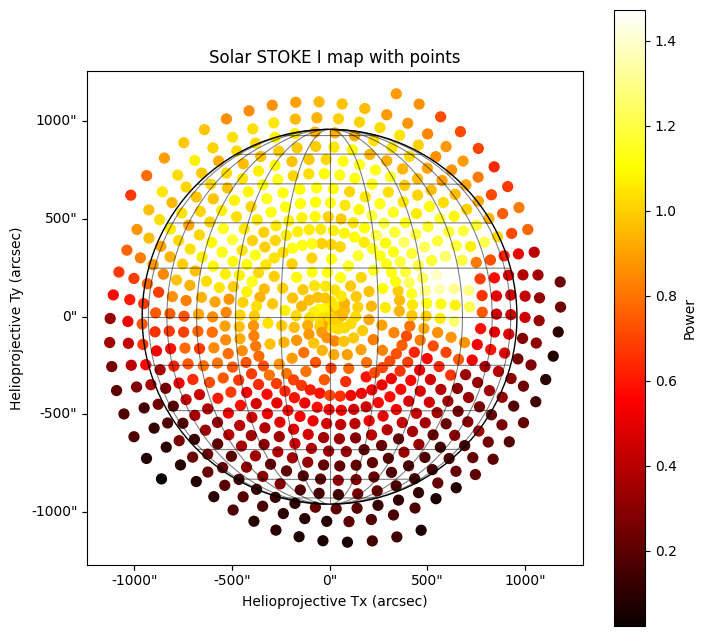

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.map

# Supongamos que tienes un DataFrame llamado rest_of_df y tienes dos arrays de objetos coordsXHelio y coordsYHelio
# Definir las coordenadas x e y para los puntos (SunX y SunY)
SunX = rest_of_df['tx_helio_anten']
SunY = rest_of_df['ty_helio_anten']
Power = rest_of_df['STOKE_I_11_4_11_90GHZ']  # Intensidad


# Definir metadatos para el mapa solar
metadata = {
    'date-obs': '2024-04-30T16:00:00',  # Ajusta esto a la fecha de observación correcta
    'crval1': 0,  
    'crval2': 0,  
    'cdelt1': 1,  
    'cdelt2': 1,  
    'cunit1': 'arcsec',  
    'cunit2': 'arcsec',  
    'ctype1': 'HPLN-TAN',  
    'ctype2': 'HPLT-TAN',  
    'crpix1': 0,  # No necesitamos esto si no estamos usando una matriz predefinida
    'crpix2': 0,  # No necesitamos esto si no estamos usando una matriz predefinida
    'waveunit': 'm',  
    'wavelnth': 0.0262897 * u.m,  
    'obsrvtry': 'Ventspils International Radio Astronomy Center',  
    'detector': 'LNSP4',  
    'dsun_obs': 1 * u.AU,  
    'hglt_obs': 0 * u.deg,  
    'hgln_obs': 0 * u.deg,  
}

# Crear un mapa solar en blanco con los metadatos
blank_map = sunpy.map.Map((np.zeros((10, 10)), metadata))

# Crear el gráfico
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection=blank_map)
blank_map.plot(axes=ax)
blank_map.draw_limb(axes=ax, color="k")
blank_map.draw_grid(axes=ax, color="k")

# Plotear los puntos en el mapa
scatter = ax.scatter(SunX, SunY, c=Power, cmap='hot', s=50)

plt.colorbar(scatter,label='Power' , ax=ax) # Agregar barra de color para la intensidad
plt.title('Solar STOKE I map with points')
plt.xlabel('Helioprojective Tx (arcsec)')
plt.ylabel('Helioprojective Ty (arcsec)')
plt.grid(True)
plt.show()


Beam size (FWHM) in arcseconds: 169.63
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


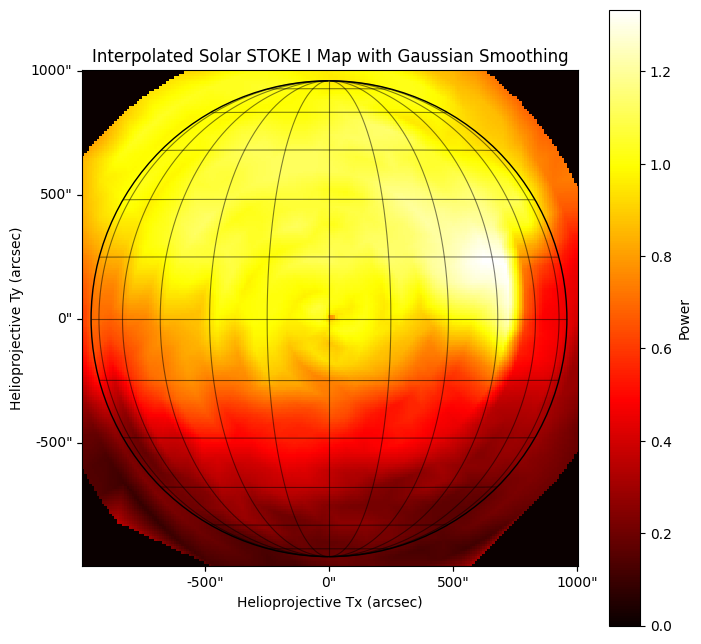

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import sunpy.map
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

# Define the grid covering the helioprojective coordinate space
tx_min, tx_max = -1000, 1000
ty_min, ty_max = -1000, 1000
grid_step = 10  # Adjust as needed

# Create a grid
tx, ty = np.meshgrid(np.arange(tx_min, tx_max, grid_step),
                     np.arange(ty_min, ty_max, grid_step))

# Constants
c = 3e8  # Speed of light in meters per second

# Convert frequency from GHz to Hz
frequency = 11.4 # Example frequency in GHz
frequency_in_hz = frequency * 1e9  # Convert GHz to Hz

# Calculate wavelength in meters
wavelength = c / frequency_in_hz

# Define dish diameter (example value)
dish_diameter = 32.0  # in meters

# Calculate the beam size (angular resolution) in radians
beam_size_rad = wavelength / dish_diameter

# Convert beam size from radians to arcseconds (1 radian = 206265 arcseconds)
beam_size_arcsec = beam_size_rad * 206265.0

# Use the beam size in gaussian_filter
sigma = beam_size_arcsec

print(f"Beam size (FWHM) in arcseconds: {beam_size_arcsec:.2f}")

# Apply Gaussian smoothing to the power values based on the beam size
smoothed_power = gaussian_filter(Power, sigma=1)

# Interpolate power values for each point on the grid
interp_power = griddata((SunX, SunY), smoothed_power, (tx, ty), method='linear', fill_value=0)

# Define metadata for the solar map
metadata = {
    'date-obs': '2024-04-30T16:00:00',  # Adjust this to the correct observation date
    'crval1': 0,
    'crval2': 0,
    'cdelt1': grid_step,
    'cdelt2': grid_step,
    'cunit1': 'arcsec',
    'cunit2': 'arcsec',
    'ctype1': 'HPLN-TAN',
    'ctype2': 'HPLT-TAN',
    'crpix1': (tx_max - tx_min) / (2 * grid_step),
    'crpix2': (ty_max - ty_min) / (2 * grid_step),
    'waveunit': 'm',
    'wavelnth': 0.0262897 * u.m,
    'obsrvtry': 'Ventspils International Radio Astronomy Center',
    'detector': 'LNSP4',
    'dsun_obs': 1 * u.AU,
    'hglt_obs': 0 * u.deg,
    'hgln_obs': 0 * u.deg,
}

# Create a map using the interpolated power values and metadata
interpolated_map = sunpy.map.Map((interp_power, metadata))

# Plot the interpolated map using a heatmap with the 'hot' colormap
plt.figure(figsize=(8, 8))
interpolated_map.plot(cmap='hot')
interpolated_map.draw_limb(color="k")
interpolated_map.draw_grid(color="k")
plt.colorbar(label='Power')
plt.title('Interpolated Solar STOKE I Map with Gaussian Smoothing')
plt.xlabel('Helioprojective Tx (arcsec)')
plt.ylabel('Helioprojective Ty (arcsec)')
plt.grid(True)
plt.show()
